# IR Evaluation
- To do system evaluation, we require an overt expression of an information eed
- For relevance we choose to use a binary decision of relevance
- `Precision = true positive/(all retrieved docs)`
- or `P = tp / (tp + fp)`

- `Recall = true positive/(all relevant docs, include those not retrieved)`
- or `R = tp / (tp + fn)`

## Unranked retrieval evaluation

### Accuracy
`(tp+tn)/all_docs`

- or `Accuracy = (tp + tn) / (tp + fp + fn + tn)`

- However, there is a way to obtain high accuracy as most documents (99%) are not relevant. A system can obtain high accuracy by declaring every document not relevant. And if we label some documents as relevant, there will be alot of false positives.

### F measure (harmonic mean)
Balanced method of evaluating a system's precision and recall and retrieval.

- Can tune beta and alpha to achieve balance `(higher beta -> smaller alpha -> favours recall)`
- Beta > 1 favours recall, beta < 1 emphasises precision

#### Pros over accuracy measure
- Professional searchers (eg, paralegals) will favour higher recall instead as irrelevant docs may be useful

#### Pros over arithmetic mean:
- Arithmetic mean is evenly distributed, meaning a 100% recall (returning all docs) and yield 50% of the average mean

### F measure for classes

eg. given a fixed number of classes: (person_name, company_name, neither).

We wish to find the F measure of the prediction on these classes. To do so we have to use micro/ macro averaging.

- Use micro averaging when we wish to determine the effectiveness in large classes
- Use macro averaging when we wish to determine effectiveness of small classes  

**Microaveraging** pools per document decisions across classes and consider the F measure there.  
**Macroaveraging** calculate F measure per class and then average them.

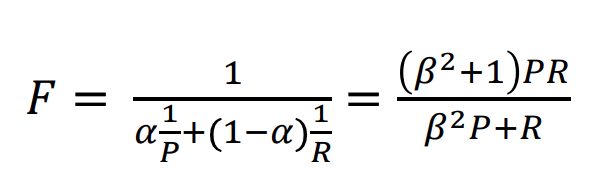


## Evaluation of ranked results

###  Precision recall curve
- System can return any number of results
- We take various numbers of the top returned documents (different levels of recall)

### Precision at top K (widely used)
Find precision at top K results. Good for most web searches as people only want the good matches on the first or second result page.

- Does not average well as it depends greatly on the number of relevant docs for a query

```
query1: doc1, doc2_, doc3_, doc4, doc5_, doc6, doc7_, doc8, doc9, doc10

We go from left to right.

at doc1: precision = 0, recall = 0
at doc2: precision = 1/2, recall = 1/4
at doc3: precision = 2/3, recall = 2/4
...
```

As we go from left to right, recall increases as we discover more and more documents. precision may rise or fall depending on the ratio of relevant docs vs discovered docs.

### 11-point interpolated average precision
Take precision at 11 levels of recall varying from 0 to 1 by tenths of documents using interpolation and average them. This evaluates performance at all recall levels.

- To perform 11point interpolated average precision, we need at least 10 relevant docs to be in the set so we can have recall in steps of 0.1
### MAP (mean average precision)
Area under precision-recall curve (uninterpolated)

- Dependent on the test collection - arithmetic average of the query collection, some can get MAP of 0.7 and some 0.1
- MAP treats every information need with equal weightage
- MAP scores vary from user to user (information need), thus it is important to have multiple query categories

### R-precision
With known set of relevant documents size `Rel`, calculate the precision of top `Rel` docs returned  
If there are `Rel` documents for a query and we find that `r` are relevant, we find R-precision by taking `r/Rel`

# Creating test collections

We need:

- test queries (what queries to choose which are relevant to the docs available)
- relevance assessments (what is relevant?)

### Kappa measure

- Agreement measure among judges
- Designed for categorical judgments
- Corrects for chance agreement

`K = (P(A)-P(E))/(1-P(E))`

P(A): proportion of time judges agree  
P(E): Probability of chance agreement = P(non-relevant)^2 + P(relevant)^2  

Some examples:

- Kappa > 0.8 good agreement
- 0.67 < Kappa < 0.8 fair agreement
- Kappa < 0.67 dubious

### Other factors

Relevance vs marginal relevance
- A document can be redundant even if it is highly relevant eg. useless spam
- Duplicates
- Same info from different sources (git forks)?
- Marginal relevance is a better measure of utlity for the user

### Other methods

- Use crowdsourcing methods to collect data
- A/B testing
    - evaluate with automatic overall evaluation criterion (OEC) eg. clickthrough on first result
    - However, still have pitfalls when both A and B versions are vastly different, hard to associate OEC with changes
- In lab testing, study user behaviours in the lab